#import os
#import conda

#conda_file_dir = conda.__file__
#conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [2]:
import re

In [3]:
import os
os.environ['PROJ_LIB'] = r"C:\ProgramData\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share"
from mpl_toolkits.basemap import Basemap

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as pic
from wordcloud import WordCloud as wc

import fuzzywuzzy
from fuzzywuzzy import process

In [5]:
food_df = pd.read_csv(r"C:\Users\byamu\Downloads\fast-food-restaurants\FastFoodRestaurants.csv")

In [6]:
food_df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


# A BRIEF INTRODUCTION TO OUR DATASET

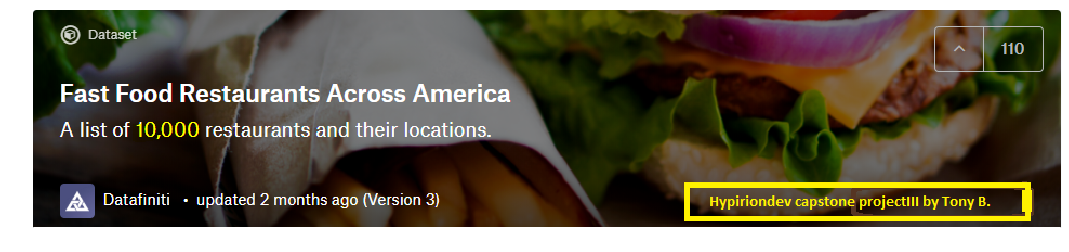

|=================================================================================================|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
address       10000 non-null object
city          10000 non-null object
country       10000 non-null object
keys          10000 non-null object
latitude      10000 non-null float64
longitude     10000 non-null float64
name          10000 non-null object
postalCode    10000 non-null object
province      10000 non-null object
websites      9535 non-null object
dtypes: float64(2), object(8)
memory usage: 781.3+ KB
None
|=================================MISSING DATA====================================================|
websites 465
|=================================TOTAL OBSERVATIONS==============================================|
(10000, 10)
|=================================TOTAL OF FAST FOOD RESTAURANTS==================================|
548
|=================================CITIES AN

In [7]:


a = pic.imread(r"C:\Users\byamu\Downloads\fast-food-restaurants\Capture.PNG")
plt.figure( figsize=(20,4))
plt.imshow(a)
plt.axis("off")
plt.show()

print('|=================================================================================================|')
print(food_df.info())
print('|=================================MISSING DATA====================================================|')
print('websites',food_df.websites.isnull().sum())
print('|=================================TOTAL OBSERVATIONS==============================================|')
print(food_df.shape)
print('|=================================TOTAL OF FAST FOOD RESTAURANTS==================================|')
print(len(food_df.name.unique()))
print('|=================================CITIES AND PROVINCES============================================|')
print(f"TOTAL OF PROVINCEs:{len(food_df.province.unique())}\nTOTAL OF CITIES:{len(food_df.city.unique())}" )
print('|=================================ALL COLUMN HEADERS==============================================|')
print(food_df.columns)
print('|=================================INDEX===========================================================|')
print(food_df.index)

print('|=================================DUPLICATED ROWS=================================================|')
print(food_df.duplicated().sum())
print('|=================================================================================================|')


Environmental Factors Affecting the Fast Food Industry
In 1970, the fast food industry was worth only \\$6 billion. Today, according to statista.com, it is worth
\\$198.9 billion and is set to grow to over \\$223 billion by 2020. In less than 50 years, this industry has evolved a great deal.
https://smallbusiness.chron.com/types-economic-factors-can-affect-fast-food-industry-36923.html

In [221]:
top_10_cities = pd.DataFrame(food_df['city'].value_counts(ascending=False).head(10).reset_index())
top_10_cities.columns=['City','total of restaurant']
top_10_cities

,City,total of restaurant
0,cincinnati,119
1,las vegas,72
2,houston,63
3,miami,58
4,denver,52
5,chicago,51
6,phoenix,42
7,columbus,41
8,atlanta,41
9,oklahoma city,41


In [8]:
top_pro = pd.DataFrame(food_df['province'].value_counts(ascending=False).head(10).reset_index())
top_pro.columns=['province','total of restaurant']
top_pro

,province,total of restaurant
0,CA,676
1,TX,634
2,OH,543
3,FL,471
4,IN,379
5,IL,363
6,NC,358
7,GA,347
8,MO,334
9,KY,332


In [14]:
top_restaurant = pd.DataFrame(food_df['name'].value_counts(ascending=False).head(10).reset_index())
top_restaurant.columns=['restaurant','total of shops']

top_restaurant

,restaurant,total of shops
0,McDonald's,1886
1,Burger King,1154
2,Taco Bell,873
3,Wendy's,731
4,Arby's,518
5,KFC,421
6,Domino's Pizza,345
7,Subway,322
8,SONIC Drive In,226
9,Hardee's,192


**THE ABOVE RESULTS MIGHT OR MIGHT NOT BE TRUE DUE TO THE FACT THAT THERE MIGHT BE DATA INCONSISTANCY IN THE DATAFRAME**

- MAYBE WE SHOULD START BY CLEANING THE DATAFRAME BEFORE MAKING ANY CONCLUSION

In [15]:
#OVER HERE WE LOWER AND STRIP EXTRA WHITE SPACE TO PREPARE THE COLUMN FOR CLEANSING
food_df['name'] = food_df['name'].str.lower()
food_df['name'] = food_df['name'].str.strip()
food_df['name'].sort_values().unique()




array(['31st avenue gyro', '7-11', '7-eleven', 'a & w family restaurant',
       'a&w', 'a&w all american food', 'a&w all-american food',
       'a&w all-american foods', 'a&w restaurant',
       'a&w/long john silvers', "aj's hotdogs & gyros", "alice's",
       'ama ristorante', 'amigos/kings classic', 'aprisa mexican cuisine',
       "arby's", "arby's antigo", 'arbys', 'arctic circle', 'au bon pain',
       "auntie anne's", 'aw restaurant', 'b k',
       'b z breakfast burgers beyond', 'b. good', 'b.good',
       'back yard burgers', 'backyard burgers', 'bad daddys burger bar',
       'baja fresh', 'baja fresh mexican grill', "baker's drive thru",
       'ball state lafollette dining', 'bamboo bistro', 'baskin-robbins',
       'bb&t', "ben & jerry's", 'bgr - the burger joint',
       "big & little's restaurant", 'bills place', "blake's lotaburger",
       'blakes lotaburger', 'blimpie', 'blimpie subs & sandwiches',
       'blondies', 'bob evans', 'bob evans restaurant',
       "bobby

#### WE NOTICED THAT THERE'S DATA INCONSISTANCY IN THE NAME OF RESTAURANT SO WE GONNA CREATE A FUNCTION TO CLEAN THA MESS UP

In [42]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
   
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matchs[0] for matchs in matches if matchs[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match

In [19]:
print(len(food_df.name.unique()), 'RESTAURANT IN TOTAL BEFORE CLEANING')

524 RESTAURANT IN TOTAL BEFORE CLEANING


In [22]:
# over here we loop through the intire column and clean one name after another
for e in food_df['name'].unique():
    replace_matches_in_column(df=food_df,column='name', string_to_match=e)
    
len(food_df['name'].sort_values().unique()), 'UNIQUE VALUES LEFT AFTER CLEANING'        

(454, 'UNIQUE VALUES LEFT AFTER CLEANING')

In [24]:
food_df['name'].sort_values().unique()[0:10]

array(['31st avenue gyro', '7-11', '7-eleven', 'a & w family restaurant',
       'a&w', 'a&w all-american foods', "aj's hotdogs & gyros", "alice's",
       'ama ristorante', 'amigos/kings classic'], dtype=object)

**AFTER IMPUTATION WE REALIZE THAT WE STILL HAVE SOME REPEATED NAMES IN THE COLUMN SO, SO I DECIDED TO HELP THE FUZZY FUZZY DECIDE THE MATCHING NAMES**

- HOW WHAT IS HAPPENING BELOW IS THE SAME WHAT THE FUNCTION ABOVE DID BUT THIS TIME INSTEAD OF LETTING THE FUNCTION DECIDE WHAT TO SELECT I DO MANUALY

In [36]:
from colorama import Fore
print(Fore.RED + '\n\n\n\n\nYOU MIGHT NOT HAVE TO RUN THIS CELL SEE THAT YOU WILL BE REQUIRE TO CLEAN CONFIRM MORETHAN 400 NAMES through input \n I HAVE SAVE A COPY OF A CLEAN DATASET HASSLE FREE')






YOU MIGHT NOT HAVE TO RUN THIS CELL SEE THAT YOU WILL BE REQUIRE TO CLEAN CONFIRM MORETHAN 400 NAMES through input 
 I HAVE SAVE A COPY OF A CLEAN DATASET HASSLE FREE


In [13]:


for each in food_df['name'].sort_values().unique():#WE LOOP THROUGH THE UNIQUE VALUE
    
    # get the top 10 closest matches to our ITERATOR
    matches = fuzzywuzzy.process.extract(each,food_df['name'].unique() , 
                                             limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    
    
    # TO CHECK IF THE FUNCTION IS WORKING WE PRINT THE CURRENT LENGHT OF UNIQUE VALUES IN THE COLUMN
    print(len(food_df.name.unique()), '\n')
    # AND WE ALSO DISPLAY THE ITERATOR AND THE 10 STRING THAT FUZZYWUZZY THINK THEIR THE CLOSEST  
    print(each,'\n\n',matches)
    
    
    # TO PREVENT OUR FLOW FROM CRASHING WE CATCH IT WITH TRY EXCEPT
    try:
        
        #THIS LIST WILL SAVE ALL THE STRING THAT I THINK THEY MATCH THE ITERATOR
        good = []   
        # THEN WE ASK THE USER (IN THIS CASE ME) TO ENTER THE TAGS (IN NUMBER) OF ALL THE NAMES THAT I THINK THEY MATCH THE ITERATOR
        percent = input('enter the the tag(percentage)')
        
        #THEN WE SPLIT THOSE NUMBERS ON A COMMA AND USE THE LIST COMPREHESION TO CHANGE ALL THE CHARACTER TO INTEGER
        percent = percent.split(',')
        percent = [int(i) for i in percent]
    
    
        # NOW IT FUN TIME! WE LOOP THROUGH THE MATCHES NAMES WHICH COMES AS A TUPLE CONSISTING OF THE MATCH NAME AND ITS PERCENTAGE 
        for e in matches:

            #THEN WE SAY IF THE ITERATOR IN THIS CASE e (BECAUSE IT A TUPLE WE CAN USE THE INDEX TO SELECT THE PERCENTAGE) IS IN percent 
            #WE APPEND THE RESULT TO THE LIST good AND PRINT THE TO CONFIRM THE TRANSACTION
            if e[1] in percent:

                good.append(e[0])
        print(good,'\n')

    except:
        print('not match\n\n')
        
            
            
        
    # get the rows of all the close matches in our dataframe
    rows_with_matches = food_df['name'].isin(good)
    # replace all rows with close matches with the ITERATOR
    food_df.loc[rows_with_matches, 'name'] = each
    

454 

31st avenue gyro 

 [('31st avenue gyro', 100), ('hot dog heaven', 47), ('chick-fil-a orange avenue', 44), ("wendy's", 43), ("dino's gyros", 43), ('pop-a-nugget', 43), ('boston market 381', 42), ('cafe rio', 42), ('taqueria', 42), ('five guys', 40)]
enter the the indexes
not match


454 

7-11 

 [('7-11', 100), ('a&w', 29), ('fitness 19', 29), ('b k', 29), ('bb&t', 25), ("jcw's", 22), ('b.good', 20), ("ryan's", 20), ("rush's", 20), ('kum go', 20)]
enter the the indexes
not match


454 

7-eleven 

 [('7-eleven', 100), ('elevation burger', 50), ('bob evans', 47), ('hot dog heaven', 45), ('omelette house', 45), ('circle drive in', 43), ("love's", 43), ('dairy queen', 42), ("wendy's", 40), ('coop deville', 40)]
enter the the indexes
not match


454 

a & w family restaurant 

 [('a & w family restaurant', 100), ("big & little's restaurant", 68), ('crystal restaurant', 67), ('islands restaurant', 67), ('china king restaurant', 67), ('bob evans restaurant', 63), ('kettle restaurant',

not match


450 

bamboo bistro 

 [('bamboo bistro', 100), ('ama ristorante', 52), ('bravo tacos', 50), ("braum's", 50), ('einstein bros bagels', 48), ('bb&t', 47), ('tropical smoothie cafe', 46), ("baker's drive thru", 45), ('taco mayo', 45), ('pollo tropical', 44)]
enter the the indexes
not match


450 

baskin-robbins 

 [('baskin-robbins', 100), ('einstein bros bagels', 53), ("raising cane's", 50), ('sunrise cafe', 46), ("rubio's coastal grill", 46), ("dino's gyros", 46), ('cousins subs', 46), ('in-a-tub', 45), ("arby's antigo", 44), ('penguin point', 44)]
enter the the indexes
not match


450 

bb&t 

 [('bb&t', 100), ('b k', 57), ('bamboo bistro', 47), ('bob evans', 46), ('taco bueno', 43), ('city bites', 43), ('b.good', 40), ('taco cabana', 40), ('burger time', 40), ("luby's", 40)]
enter the the indexes
not match


450 

ben & jerry's 

 [("ben & jerry's", 100), ("tom & jerry's", 64), ("subway - bell's ferry", 60), ("jolly's drive-in", 52), ("mclaren's pantry", 52), ("kenny's d

enter the the indexes
not match


447 

burger's landing 

 [("burger's landing", 100), ('burger king', 74), ('fab wings n burgers', 74), ("nick's burgers", 73), ('elevation burger', 69), ('in-n-out burger', 65), ("milo's hamburgers", 61), ('mr char-burger', 60), ("pete's burgers", 60), ('burger time', 59)]
enter the the indexes
not match


447 

burgerville, usa 

 [('burgerville, usa', 100), ("nick's burgers", 62), ('burger time', 62), ("milo's hamburgers", 62), ("pete's burgers", 62), ('in-n-out burger', 60), ("burger's landing", 58), ('elevation burger', 58), ("bobby's burger palace", 56), ("gabby's burgers & fries", 56)]
enter the the indexes
not match


447 

bush's chicken 

 [("bush's chicken", 100), ('buds chicken & seafood', 76), ("charlie's chicken", 71), ('popeyes chicken & biscuits', 68), ('slim chickens', 67), ('chicken house', 67), ("nick's burgers", 64), ('chicken express', 62), ('ny chicken fish', 62), ("checker's", 61)]
enter the the indexes
not match


447 

cafe rio

not match


439 

chicago union station food court 

 [('chicago union station food court', 100), ('luxor food court', 54), ('penn station east coast subs', 50), ('great steak and potato co', 46), ('china king restaurant', 45), ("tina's carryout restaurant", 45), ('crispy chicken & seafood', 44), ('hot dog on a stick', 44), ('gold star chili', 43), ('crown fried chicken', 43)]
enter the the indexes
not match


439 

chick-fil-a 

 [('chick-fil-a', 100), ('j j fish and chicken', 65), ('ny chicken fish', 62), ('golden chick', 61), ('chick-fil-a orange avenue', 61), ("chick-fil-a truett's luau", 61), ('chick-fil-a magnolia mall', 61), ('arctic circle', 58), ('slim chickens', 58), ("charlie's chicken", 57)]
enter the the indexes61
['golden chick', 'chick-fil-a orange avenue', "chick-fil-a truett's luau", 'chick-fil-a magnolia mall'] 

435 

chick-fil-a magnolia mall 

 [('chick-fil-a', 61), ('j j fish and chicken', 53), ("raising cane's chicken fingers", 51), ('gold star chili', 50), ('ny 

enter the the indexes
not match


431 

costa vida 

 [('costa vida', 100), ('custard hut & pizza', 52), ('los verdes', 50), ('costa vida fresh mexican grill', 50), ("captain d's", 48), ('coop deville', 45), ('white castle', 45), ("kasa's pizza", 45), ("rubio's coastal grill", 45), ('tacotime', 44)]
enter the the indexes50
['los verdes', 'costa vida fresh mexican grill'] 

429 

costa vida fresh mexican grill 

 [('chipotle mexican grill', 69), ('qdoba mexican grill', 65), ("rubio's coastal grill", 55), ('qdoba mexican eats', 54), ("maria's fry bread & mexican food", 53), ("nielsen's frozen custard", 52), ('a&w all-american foods', 50), ('costa vida', 50), ('aprisa mexican cuisine', 50), ('mayfair boardwalk grill', 49)]
enter the the indexes
not match


429 

cousins subs 

 [('cousins subs', 100), ('quiznos sub', 70), ('music city subs', 67), ('firehouse subs', 62), ('subway guitars', 54), ("jersey mike's subs", 53), ('madison street subs', 52), ('penn station east coast subs', 50), (

enter the the indexes
not match


424 

don & millie's 

 [("don & millie's", 100), ("mcalister's deli", 57), ('mcdonald’s', 55), ("mcdonald's of mililani mauka", 55), ("portillo's", 55), ("jim's coney island", 53), ("alice's", 53), ('coop deville', 50), ("fazoli's", 50), ("jolly's drive-in", 50)]
enter the the indexes
not match


424 

dq grill & chill 

 [('dq grill & chill', 100), ('char-grill', 67), ('chipotle mexican grill', 56), ('gold star chili', 55), ("chester's grill", 55), ("charley's grilled subs", 50), ('circle drive in', 48), ('dawg house grill', 47), ('coop deville', 46), ("rubio's coastal grill", 46)]
enter the the indexes
not match


424 

dq woodlands 

 [('dq woodlands', 100), ('food 4 less', 52), ('subway - roland park', 47), ('mcdonald’s', 45), ('mc donalds', 45), ('b.good', 44), ('noodles & company', 44), ('wendys', 44), ("burger's landing", 43), ('garden fast food', 43)]
enter the the indexes
not match


424 

dual - carls / grn burrito 1100654 

 [("hardee's / r

enter the the indexes
not match


424 

fosters freeze 

 [('fosters freeze', 100), ('dairy freeze', 62), ('roy rogers', 50), ('omelette house', 50), ('farmer boys', 48), ('garden fast food', 47), ('convergence zone', 47), ("nielsen's frozen custard", 47), ('waffle house', 46), ("fred's store", 46)]
enter the the indexes
not match


424 

fred's store 

 [("fred's store", 100), ("freddy's steakburger", 69), ("tom's drive in", 54), ("braum's ice cream & dairy store", 54), ('thrashers french fries', 53), ('great steak', 52), ("tom's grill", 52), ("tom & jerry's", 52), ('sunrise cafe', 50), ('steak escape', 50)]
enter the the indexes
not match


424 

freddy's steakburger 

 [("freddy's steakburger", 100), ("fred's store", 69), ('fatburger', 55), ("blake's lotaburger", 53), ('great steak', 52), ('smashburger', 52), ('backyard burgers', 50), ('b z breakfast burgers beyond', 50), ('steak escape', 50), ('hegenburgers', 50)]
enter the the indexes
not match


424 

fresh city 

 [('fresh city'

enter the the indexes
not match


423 

hardee's / red burrito / dough boys 

 [("hardee's / red burrito / dough boys", 100), ("hardee's / red burrito", 78), ('red robin gourmet burgers', 50), ("bobby's burger palace", 50), ("moe's original bar b que", 47), ('good times burgers & frozen custard', 47), ("tudor's biscuit world", 46), ('bad daddys burger bar', 46), ('checkers burgers and fries', 46), ('mooyah burgers, fries & shakes', 45)]
enter the the indexes
not match


423 

hardees 

 [('hardees', 100), ('charkies', 67), ("hardee's / red burrito", 52), ("checker's", 50), ('meatheads', 50), ('charcoal delights', 50), ("charlie's chicken", 50), ('baja fresh', 47), ('sheetz', 46), ('dairy queen', 44)]
enter the the indexes52
["hardee's / red burrito"] 

422 

hegenburgers 

 [('hegenburgers', 100), ("checker's hamburgers", 62), ('smashburger', 61), ('fatburger', 57), ("milo's hamburgers", 55), ("nick's burgers", 54), ("pete's burgers", 54), ("blake's lotaburger", 53), ('everest', 53), (

enter the the indexes
not match


422 

jamjam 

 [('jamjam', 100), ('jamba juice', 47), ("samurai sam's", 42), ('baja fresh', 38), ('panda', 36), ('jimmy johns', 35), ('sarku japan', 35), ("papa john's", 35), ("jack's", 33), ('hunam garden', 33)]
enter the the indexes
not match


422 

jason's deli 

 [("jason's deli", 100), ("mcalister's deli", 64), ("denton's", 60), ('taco delight', 58), ("jolly's drive-in", 57), ("lion's choice", 56), ("famous dave's", 56), ('sonic drive-in', 54), ('goodcents deli fresh subs', 54), ('jimmy johns', 52)]
enter the the indexes
not match


422 

jcw's 

 [("jcw's", 100), ("jack's", 73), ("rocky's", 50), ("alice's", 50), ("checker's", 43), ('mcdonald’s', 40), ('baja fresh', 40), ('shloma inc', 40), ('fresh city', 40), ("taco john's", 38)]
enter the the indexes
not match


422 

jersey jacks eatery 

 [('jersey jacks eatery', 100), ('seaside eatery', 67), ('jacks grocery', 56), ('northeastern state university', 50), ("jack's", 48), ('dairy cheer', 47), (

enter the the indexes48
['crystal restaurant'] 

419 

kum go 

 [('kum go', 100), ('siam to go', 50), ('gyros kings', 47), ('mr. hero', 46), ('cookout', 46), ("nick's gyros", 44), ('hunam garden', 44), ('b k', 44), ("osgood's", 43), ('jacks grocery', 42)]
enter the the indexes
not match


419 

lanesplitter pizza & pub 

 [('lanesplitter pizza & pub', 100), ('little caesars pizza', 67), ('the pizza pipe line', 63), ("gianni's pizza", 56), ("little caesar's pizza smithfield", 56), ("kasa's pizza", 53), ('pizza one', 52), ("dewey's pizza", 51), ('pizza factory', 51), ('pizza express', 51)]
enter the the indexes
not match


419 

lee's famous recipe chicken 

 [("lee's famous recipe chicken", 100), ("church's chicken", 60), ('chicken house', 60), ("popeye's chicken", 60), ('crown fried chicken', 57), ("checker's hamburgers", 55), ('slim chickens', 55), ('jack pirtles chicken', 55), ('the chicken place', 55), ("jim bob's chicken fingers", 54)]
enter the the indexes
not match


419 

lee's

enter the the indexes
not match


418 

mazatlan mexican restaurant 

 [('mazatlan mexican restaurant', 100), ('italian pizzeria restaurant', 70), ('kettle restaurant', 64), ('islands restaurant', 62), ('el paragua restaurant', 58), ("big & little's restaurant", 56), ('el tarasco mexican food', 56), ('ama ristorante', 54), ('qdoba mexican eats', 53), ("ernie's all american burger", 52)]
enter the the indexes
not match


418 

mc donalds 

 [('mc donalds', 100), ('mcdonald’s', 70), ("mcdonald's - walmart", 64), ("mcdonald's #25557", 54), ('mcdonalds @ old atlanta', 52), ('taco local', 50), ("taco john's", 48), ('original tracks', 48), ("don & millie's", 45), ('dq woodlands', 45)]
enter the the indexes
not match


418 

mcalister's deli 

 [("mcalister's deli", 100), ("don & millie's", 57), ("petro's chili & chips", 57), ("alice's", 52), ('twisters', 50), ("car's late night delivery", 49), ("checker's", 48), ("auntie anne's", 48), ("charlie's chicken", 48), ("famous dave's", 48)]
enter t

enter the the indexes
not match


412 

ny chicken fish 

 [('ny chicken fish', 100), ('kentucky fried chicken', 70), ("church's chicken", 65), ('slim chickens', 64), ('chicken house', 64), ("bush's chicken", 62), ('kennedy fried chicken & pizza', 62), ("jim bob's chicken fingers", 60), ('crispy chicken & seafood', 59), ('crown fried chicken', 59)]
enter the the indexes
not match


412 

old country buffet 

 [('old country buffet', 100), ('royal buffet', 67), ('home town buffet', 59), ("tudor's biscuit world", 51), ('fallguys burger company', 49), ('the biscuit factory', 49), ("cody's cafe", 48), ('lime ricky world', 47), ('red robin gourmet burgers', 47), ('el pollo loco', 45)]
enter the the indexes
not match


412 

omega drive-in 

 [('omega drive-in', 100), ("tom's drive in", 79), ('sonic drive-in', 71), ('vista drive in', 71), ("shepard's drive-in", 69), ("jolly's drive-in", 67), ("kenny's drive-in", 67), ('loco moco drive-inn', 67), ('sonic drive-in (trailer)', 61), ("eagan's dr

not match


409 

pizza factory 

 [('pizza factory', 100), ('pizza barn', 70), ('pizza hut', 64), ('pizza one', 64), ('custard hut & pizza', 60), ('luna corner pizza', 60), ("kasa's pizza", 56), ('yellow cab pizza co.', 56), ('dominos pizza', 54), ("dewey's pizza", 54)]
enter the the indexes
not match


409 

pizza hut 

 [('pizza hut', 100), ('custard hut & pizza', 69), ('pizza one', 67), ('pizza factory', 64), ('pizza barn', 63), ('pizza hut wingstreet', 62), ('breadeaux pizza', 58), ("kasa's pizza", 57), ('dominos pizza', 55), ("dewey's pizza", 55)]
enter the the indexes62
['pizza hut wingstreet'] 

408 

pizza hut wingstreet 

 [('wingstreet', 67), ('pizza hut', 62), ("topper's pizza", 53), ('greek oven pizza and wings', 52), ('pizza primetime', 51), ('italian pizzeria restaurant', 51), ("kasa's pizza", 50), ('the pita pit', 50), ('wings and philly', 50), ('custard hut & pizza', 49)]
enter the the indexes
not match


408 

pizza one 

 [('pizza one', 100), ('pizza barn', 74), ('do

enter the the indexes
not match


404 

red robin gourmet burgers 

 [('red robin gourmet burgers', 100), ("pete's burgers", 62), ('good times burgers & frozen custard', 55), ('fab wings n burgers', 55), ("rich's mighty fine burgers grub", 54), ('elevation burger', 54), ('st louis original hamburgers', 53), ('bgr - the burger joint', 53), ("gabby's burgers & fries", 52), ('checkers burgers and fries', 51)]
enter the the indexes
not match


404 

redbox 

 [('redbox', 100), ("rubio's", 46), ("fred's store", 44), ('greyhound', 40), ('eldon drive in', 40), ('roy rogers', 38), ('breadeaux pizza', 38), ('exxon', 36), ('b.good', 33), ('wendys', 33)]
enter the the indexes
not match


404 

regal cinemas tikahtnu  16 imax & rpx 

 [('regal cinemas tikahtnu  16 imax & rpx', 100), ('penn station east coast subs', 45), ('aprisa mexican cuisine', 43), ('the pizza pipe line', 42), ('chick-fil-a superstition springs center', 41), ('little caesars pizza', 41), ('cherry hill drive in ice cream', 41), 

enter the the indexes
not match


404 

shoney's on the go 

 [("shoney's on the go", 100), ('the honeybaked ham company', 59), ("moe's southwest grill", 56), ("george's gyros spot", 54), ('steak n shake', 52), ('the people connection', 51), ('shot tower inn', 50), ('the halal guys', 50), ('jack in the box', 48), ("kam's chop suey", 48)]
enter the the indexes
not match


404 

shoprite 

 [('shoprite', 100), ('white castle', 50), ('scoopers', 50), ('charkies', 50), ('the agora', 47), ('sonic', 46), ('shot tower inn', 45), ('ama ristorante', 45), ('charlie browns', 45), ('sheetz', 43)]
enter the the indexes
not match


404 

shot tower inn 

 [('shot tower inn', 100), ("topper's pizza", 57), ('steak n shake', 52), ("p. terry's", 52), ('smoothie king', 52), ("tom's drive in", 50), ("shoney's on the go", 50), ('shloma inc', 50), ('sonic drive-in (trailer)', 50), ("taco john's", 48)]
enter the the indexes
not match


404 

siam to go 

 [('siam to go', 100), ("taco john's", 57), ("tom's gr

enter the the indexes57,49,48
['subway sandwiches and salads', 'subway sandwiches', 'subway citgo of quarryville', "subway - bell's ferry", 'subway (johnson) @ jonesboro'] 

399 

subway citgo of quarryville 

 [('subway guitars', 54), ('burgerville, usa', 52), ('subway - roland park', 49), ("charley's grilled subs", 49), ('music city subs', 48), ('coop deville', 46), ("arby's antigo", 45), ("tubby's grilled submarines", 45), ("d'angelo grilled sandwiches", 44), ('cousins subs of green bay - oneida st. & ramada way', 44)]
enter the the indexes
not match


399 

subway guitars 

 [('subway guitars', 100), ('subway®', 60), ('quiznos sub', 56), ('subway - roland park', 56), ('cousins subs', 54), ('firehouse subs', 50), ('music city subs', 48), ('hub city express', 47), ('hunam garden', 46), ('custard hut & pizza', 45)]
enter the the indexes
not match


399 

subway sandwiches 

 [('subway guitars', 58), ('subway - roland park', 57), ('subway®', 52), ('islands restaurant', 51), ("richie's 

enter the the indexes
not match


396 

the pita pit 

 [('the pita pit', 100), ('the pizza pipe line', 65), ('the chicken place', 55), ('jack in the box', 52), ('the biscuit factory', 52), ('pizza primetime', 52), ('pizza hut', 48), ('penguin point', 48), ('thunder ridge ampride', 48), ("p. terry's", 48)]
enter the the indexes
not match


396 

the pizza pipe line 

 [('the pizza pipe line', 100), ('the pita pit', 65), ('lanesplitter pizza & pub', 63), ("gianni's pizza", 61), ('pizza one', 57), ("dewey's pizza", 56), ('pizza express', 56), ('taco bell/pizza hut express', 52), ('little caesars pizza', 51), ('dominos pizza', 50)]
enter the the indexes
not match


396 

the press club 

 [('the press club', 100), ('hub city express', 60), ('cypress best', 54), ("wetzel's pretzels", 52), ('the chicken place', 52), ('mocha express', 52), ('baja fresh', 50), ("baker's drive thru", 50), ('thrashers french fries', 50), ('fresh city', 50)]
enter the the indexes
not match


396 

thrashers fren

enter the the indexes
not match


395 

wings and philly 

 [('wings and philly', 100), ('greek oven pizza and wings', 57), ("hungry andy's", 55), ('king grill', 54), ('charleys philly steaks', 53), ("wings n' more wings", 53), ("d'angelo grilled sandwiches", 51), ("jolly's drive-in", 50), ("don & millie's", 50), ("grandy's", 50)]
enter the the indexes
not match


395 

wings n' more wings 

 [("wings n' more wings", 100), ('fab wings n burgers', 59), ('greek oven pizza and wings', 55), ("raising cane's chicken fingers", 54), ("eagan's drive-in", 53), ("burger's landing", 53), ('wings and philly', 53), ("jim bob's chicken fingers", 51), ('vista drive in', 50), ('kings contrivance jewelers', 50)]
enter the the indexes
not match


395 

wingstop 

 [('wingstop', 100), ('wingstreet', 67), ('twisters', 50), ('pop-a-nugget', 50), ('smoothie king', 48), ("tom's drive in", 45), ("topper's pizza", 45), ('shot tower inn', 45), ('shloma inc', 44), ('peking wok', 44)]
enter the the indexes
not ma

In [246]:
len(food_df.name.unique()), 'AFTER HUSTLE CLEANING'

395

In [250]:
food_df.name.sort_values().unique()

array(['31st avenue gyro', '7-11', '7-eleven', 'a&w',
       'a&w all-american foods', "aj's hotdogs & gyros", "alice's",
       'ama ristorante', 'amigos/kings classic', 'aprisa mexican cuisine',
       "arby's antigo", 'arctic circle', 'au bon pain', "auntie anne's",
       'b k', 'b z breakfast burgers beyond', 'b.good',
       'backyard burgers', 'bad daddys burger bar', 'baja fresh',
       "baker's drive thru", 'ball state lafollette dining',
       'bamboo bistro', 'baskin-robbins', 'bb&t', "ben & jerry's",
       'bgr - the burger joint', "big & little's restaurant",
       'bills place', "blake's lotaburger", 'blimpie', 'blondies',
       'bob evans', "bobby's burger palace",
       "bojangles' famous chicken 'n biscuits", 'boston chowda company',
       'boston market 381', "braum's", "braum's ice cream & dairy store",
       'bravo tacos', 'breadeaux pizza', "brixton's",
       'buds chicken & seafood', 'burger king', 'burger time',
       "burger's landing", 'burgerville, u

## SO THAT IS MUCH BETTER FOR NOW. BEFORE WE DO THE LAST CHECK OF THAT COLUMN LET'S LOOK AT SOME PROBLEMS WE MIGHT HAVE IN THE PROVINCE COLUMN

- SO FAR, WE ARE ABLE TO SEE THE NUMBER OF FAST FOOD RESTAURANT IN EACH PROVINCE, AND TO TELL WHICH STATE HAS THE MOST FAST FOOD AND WHERE FAST FOOD RESTAURANTS ARE SCARCE.

- BUT WE CAN'T TELL WHICH STATE HAS THE FAST FOOD PER METER OR MILE SQUARE. (this is important because let's say for instance you want to find a city where you can start a fast food business, you will more likely go where the competition is not high. but if you looking at a 2000m² state that has 30 restaurants   and another 1000m² one that has 20 restaurants if you don't take the surface into consideration you might end up making the mistake of investing in the state with 20 restaurant)

- HAVING SAY THAT WE GONNA GO AHEAD AND BRING IN A PIECE OF ANOTHER DATASET THAT WILL GET US THE STATEs area

In [25]:
mile_sq = pd.read_csv(r"https://people.sc.fsu.edu/~jburkardt/datasets/states/state_area.txt", delim_whitespace=True,header=None, names = ['province','mile_sq']).set_index('province')

In [26]:
mile_sq.head()

,mile_sq
province,
AL,52419
AK,663267
AZ,113998
AR,53179
CA,163695


In [29]:
#food_df.province['Co Spgs']

print(len(food_df.province.unique()))
pro = food_df.province.unique()
pro.sort()
print(pro)
print(mile_sq.shape)
sta = mile_sq.index.unique()

print(sta)

52
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'Co Spgs' 'DC' 'DE' 'FL' 'GA' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS'
 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
(53, 1)
Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY'],
      dtype='object', name='province')


- Notice that we have two different list of USA states food_df=52 and mile_sq=53.
- In our original food_df we have an extra COLORADO states named "Co Spgs" stand which stand for Cplorada Spring now I'm gonna assume that everybody knows that "CO" and "Co Spgs" mean the same thing. what we are going to do is to prove that since we have the location coordinates of both states.
- below is Map that prove that.

- if we set that "Co spgs" to "CO" we gonna be left with 51 states. 
- Now the question is, what we gonna do with the other df where we have 53 states. well let's first identify those extra states then we can decide what to with them.

- so we have["PR" For puerto rica and "US" for UNITED STATE] now we know we do not need the "US" and about Puerto rica below is some useful info and reason why we should drop it. and why we will be left with 51 states instead of 50.


**51st state refers to a place or territory that is not one of the 50 states of the United States, but people think about making it the 51st state. ... It is usually said about the possibility of Puerto Rico or other U.S. territories becoming part of the United States.
https://simple.m.wikipedia.org/wiki/51st_state**

**The United States of America. The District of Columbia is a federal district, not a state. Many lists include DC and Puerto Rico, which makes for 52 "states and other jurisdictions". ... The flag has 50 stars, one for each state.**





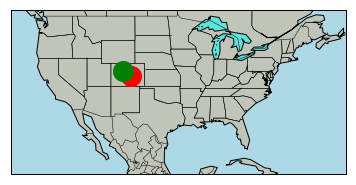

In [394]:
#draw a map to prove that "CO" and "Co Spgs" are the same.
word  = Basemap(projection='mill', llcrnrlat=20, urcrnrlat=50, 
                                   llcrnrlon=-130, urcrnrlon=-60, resolution='c')#  over here we draw the map limit
                                                                                 #  in this case USA limit



#then we draw the necessary lines, boundaries and colors
word.drawcoastlines()
word.fillcontinents(color='tan',lake_color='aqua',alpha=0.5)
word.drawmapboundary(fill_color='lightblue')
word.drawstates()
word.drawcountries()


#over here we set the the longitude and latitude for "Co spgs" we just gonna use one value
lat = list(food_df.loc[food_df.province == 'Co Spgs', 'latitude'])[0]
lon = list(food_df.loc[food_df.province == 'Co Spgs', 'longitude'])[0]

#then we set x,y axis based on the "Co spgs" data we have colected
x,y= word(lon,lat)

#now we plot the one of the restaurant and set the color red
word.plot(x,y,'ro',markersize=20, alpha=1)


 #we do for "CO" same as we did with "Co Spgs" but here we gonna use green for color
lat = list(food_df.loc[food_df.province == 'CO', 'latitude'])[0]
lon = list(food_df.loc[food_df.province == 'CO', 'longitude'])[0]

x,y= word(lon,lat)

word.plot(x,y,'go',markersize=20, alpha=1)

In [30]:
#now that we have no doubt that they are the same its time to rename them
food_df.loc[food_df.province=="Co Spgs", 'province'] = 'CO'
d = food_df.province.unique()
d.sort()
d

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
# as agreed above we're going to drop the "US" and "PR"
mile_sq.drop(["US","PR"], axis=0, inplace=True)

In [38]:
#now the time to join the mile_sq df to food_df  

#basically here what we're doing is: we take the mile_sq df and join it to food_df based on province
food_df = food_df.join(mile_sq, on='province', rsuffix='_mile_sq')

food_df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,mile_sq,mile_sq_mile_sq
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,mcdonald’s,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",54556,54556
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,wendy's,43160,OH,http://www.wendys.com,44825,44825
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,frisch's big boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",40410,40410
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,mcdonald’s,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",54556,54556
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,omg! rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",44825,44825


**AND WE'RE GONNA ALSO DROP THE COLUMN THAT WE'RE NOT GOING TO USE**

In [39]:
food_df.drop(['postalCode', 'websites'], axis=1, inplace=True)

### check the credibility of our df

In [475]:

print('duplitcates\n',food_df.duplicated().sum())
print('missing values\n',food_df.isnull().sum())
#cool let's move on


duplitcates
 0
missing values
 address      0
city         0
country      0
keys         0
latitude     0
longitude    0
name         0
province     0
mile_sq      0
dtype: int64


# SWEET

In [476]:
#now just in case, we gonna save this CHANGES AS a check point IN A CSV FILEcsv file and take it from there
food_df.to_csv(r"C:\Users\byamu\Downloads\fast_food_clean.CSV", index=False)


In [40]:
new_df = pd.read_csv(r"C:\Users\byamu\Downloads\fast_food_clean.CSV")
new_df.head()

,address,city,country,keys,latitude,longitude,name,province,mile_sq
0,324 Main St,massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,mcdonald’s,NY,54556
1,530 Clinton Ave,washington court house,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,wendys,OH,44825
2,408 Market Square Dr,maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,frisch's big boy,KY,40410
3,6098 State Highway 37,massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,mcdonald’s,NY,54556
4,139 Columbus Rd,athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,omg! rotisserie,OH,44825


In [41]:
print('TOTAL RESTAURANTS(shops)\n\n', '   ',new_df['keys'].count(),'\n')
print('TOTAL BRANDS\n\n','     ', len(new_df.name.unique()))
top_10_restaurant = pd.DataFrame(new_df.name.value_counts(ascending=False).head(10)).reset_index()
top_10_restaurant.columns = ['restaurant' , 'total']
top_10_restaurant

TOTAL RESTAURANTS(shops)

     10000 

TOTAL BRANDS

       395


,restaurant,total
0,mcdonald’s,2121
1,burger king,1156
2,kfc/taco bell,922
3,wendys,734
4,arby's antigo,521
5,kfc,441
6,subway®,416
7,sonic drive-in,386
8,dominos pizza,360
9,hardees,213


**THE CITY COLUMN IS CLEAN BUT JUST FOR ARGUMENT'S SAKE WE'RE GOING TO DOUBLE CHECK IT WITH OUR FUNCTION**

In [44]:
new_df['city'] = new_df['city'].str.lower()
new_df['city'] = new_df['city'].str.strip()
len(new_df.city.unique()),'CITY COLUMN LENGHT BEFORE CLEANING'

(2775, 'CITY COLUMN LENGHT BEFORE CLEANING')

In [45]:
# over here we loop through the intire column and clean one city after another
for e in new_df['city'].unique():
    replace_matches_in_column(df=new_df,column='city', string_to_match=e)
    
len(new_df['city'].sort_values().unique()), 'UNIQUE VALUES LEFT AFTER CLEANING'        

(2693, 'UNIQUE VALUES LEFT AFTER CLEANING')

In [ ]:
list(food_df['city'].sort_values().unique())  #the city is clean as well

**But we know that the restaurant is not completly clean. ("name" column)**
* since we know that the big part of the jon has been computly done by the fuzzywuzzy we can also check manually just to make sure than we gonna use regular expression to finish the job

In [9]:
names = new_df['name'].unique()
names.sort()
names

array(['31st avenue gyro', '7-11', '7-eleven', 'a&w',
       'a&w all-american foods', "aj's hotdogs & gyros", "alice's",
       'ama ristorante', 'amigos/kings classic', 'aprisa mexican cuisine',
       "arby's antigo", 'arctic circle', 'au bon pain', "auntie anne's",
       'b k', 'b z breakfast burgers beyond', 'b.good',
       'backyard burgers', 'bad daddys burger bar', 'baja fresh',
       "baker's drive thru", 'ball state lafollette dining',
       'bamboo bistro', 'baskin-robbins', 'bb&t', "ben & jerry's",
       'bgr - the burger joint', "big & little's restaurant",
       'bills place', "blake's lotaburger", 'blimpie', 'blondies',
       'bob evans', "bobby's burger palace",
       "bojangles' famous chicken 'n biscuits", 'boston chowda company',
       'boston market 381', "braum's", "braum's ice cream & dairy store",
       'bravo tacos', 'breadeaux pizza', "brixton's",
       'buds chicken & seafood', 'burger king', 'burger time',
       "burger's landing", 'burgerville, u

In [46]:
# we can see that 7 eleven is repeated and a&w familly restaurant and some other name that the fuzzywuzzy did not detect
import re

# over here we're check in the name column and check if it contains a given string than replace it with one comon name
new_df.loc[new_df.name.str.contains("seven|7",flags=re.I, regex=True), 'name'] = '7-eleven'
new_df.loc[new_df.name.str.contains("seven|7",flags=re.I, regex=True), 'name']

6506    7-eleven
8733    7-eleven
8834    7-eleven
Name: name, dtype: object

In [47]:
#for a&w all-american foods   we gonna specify that it need to start with 'a&w' because for other shop that conains
#a&W it problably an special arrangement type of brand. like the yum brands or the c'mon one we can be familiar with in 
# SA is dunk and dougnut & burgerking now if you have a shop like that you cannot say is dunk & doughnut or is burger. 
#same apply with the arrangement like kfc/ tako bell. two brand form one brand
new_df.loc[new_df.name.str.contains("^a&w",flags=re.I, regex=True), 'name'] = 'a&w all-american foods'

In [48]:
new_df.loc[new_df.name.str.contains("checker",flags=re.I, regex=True), 'name'] = "checker's hamburgers"

In [49]:
new_df.loc[new_df.name.str.contains("chipot",flags=re.I, regex=True), 'name'] = 'chipotle mexican grill'

In [ ]:
new_df.loc[new_df.name.str.contains("|canes",flags=re.I, regex=True), 'name'] = "raising cane's chicken fingers"

In [50]:
new_df.loc[new_df.name.str.contains("raising|canes",flags=re.I, regex=True), 'name'] = "raising cane's chicken fingers"

In [51]:
#now let's see the difference
#from last check 395
print(new_df.name.unique().shape)


(390,)


In [274]:
province = food_df.province.value_counts(ascending=False)
print('THE 5 TOP PROVINCE WITH THE MOST FAST FOOD RESTAURANT IN THE US\n\n\n',
      province.head(),'\n\n\n',
      'THE 5 TOP PROVINCES WITH THE LEAST FAST FOOD IN THE US\n\n\n', province.tail())

THE 5 TOP PROVINCE WITH THE MOST FAST FOOD RESTAURANT IN THE US


 CA    676
TX    634
OH    543
FL    471
IN    379
Name: province, dtype: int64 


 THE 5 TOP PROVINCES WITH THE LEAST FAST FOOD IN THE US


 MT         25
RI         24
DC         21
AK         14
Co Spgs     5
Name: province, dtype: int64


# Now onto visualization

## first we want to see how the restaurant are doing Province wize.

In [ ]:
new_df

Text(0, 0.5, "total of mcdonald's")

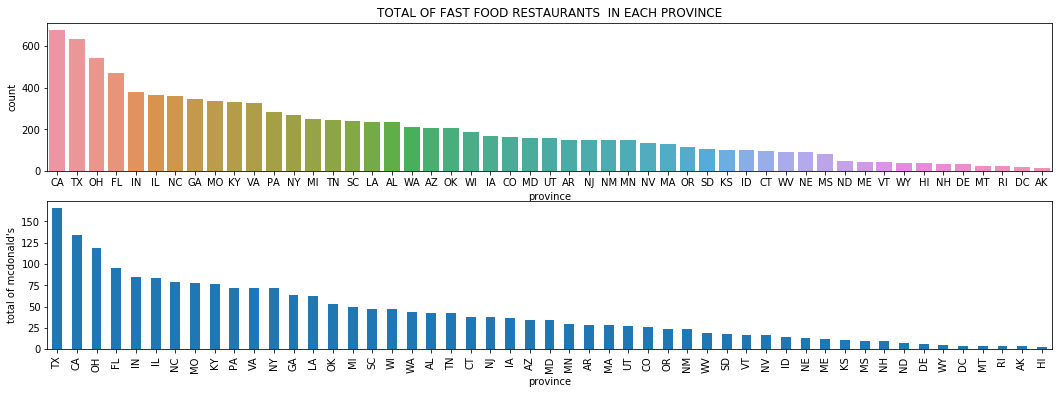

In [53]:

descending_order = new_df.province.value_counts(ascending=False).index
plt.figure( figsize=(18,6))
plt.subplot(211)
sns.countplot(x='province', data=new_df, order=descending_order)
plt.title('TOTAL OF FAST FOOD RESTAURANTS  IN EACH PROVINCE')

plt.subplot(212)
pd.DataFrame(new_df['name'].groupby(new_df['province']
                                   ).value_counts(ascending=False).unstack(
                                   )).loc[:,"mcdonald’s"].sort_values(ascending=False).plot.bar()
plt.ylabel("total of mcdonald's")

In [54]:
top_restaurant = pd.DataFrame(new_df['name'].value_counts(ascending=False).head(10).reset_index())
top_restaurant.columns=['restaurant','total of shops']

top_restaurant

,restaurant,total of shops
0,mcdonald’s,2121
1,burger king,1156
2,kfc/taco bell,922
3,wendys,734
4,arby's antigo,521
5,kfc,441
6,subway®,416
7,sonic drive-in,386
8,dominos pizza,360
9,hardees,213


**We see that macdonald not only is the biggest fast food brand in the US but also it has the tendency of leading the industry**

**We can also masure the other two following brands and see how they are doing compare to macdonalds**

Text(0.5, 1.0, 'MACDONALDS COMPARE TO BURGER KING AND KFC/TACO BELL')

<Figure size 3600x1200 with 0 Axes>

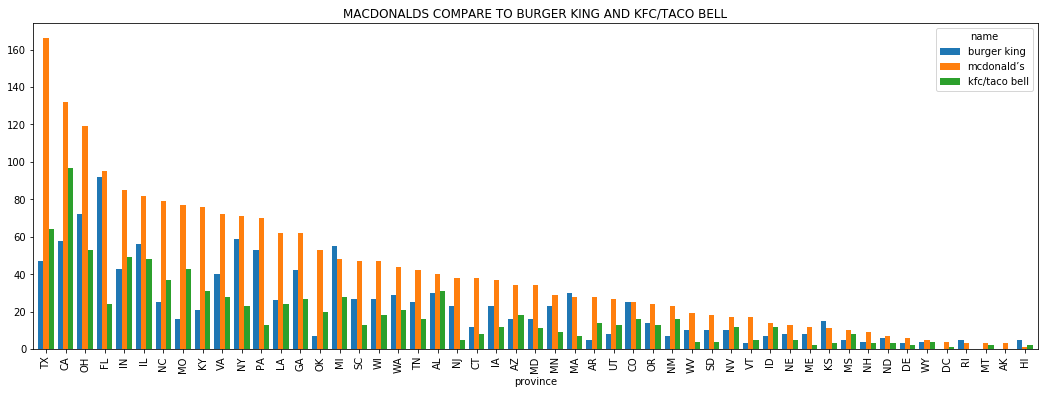

In [82]:
plt.figure( figsize=(18,6), dpi=200)
pd.DataFrame(food_df['name'].groupby(food_df['province']).value_counts(ascending=False).unstack()
            ).loc[:,['burger king',"mcdonald’s",'kfc/taco bell']].sort_values(by ="mcdonald’s",
            ascending=False).plot.bar(width=0.8,figsize=(18,6))

plt.title('MACDONALDS COMPARE TO BURGER KING AND KFC/TACO BELL')

Text(0.5, 1.0, 'FAST FOOD LEADING BRANDS IN THE US')

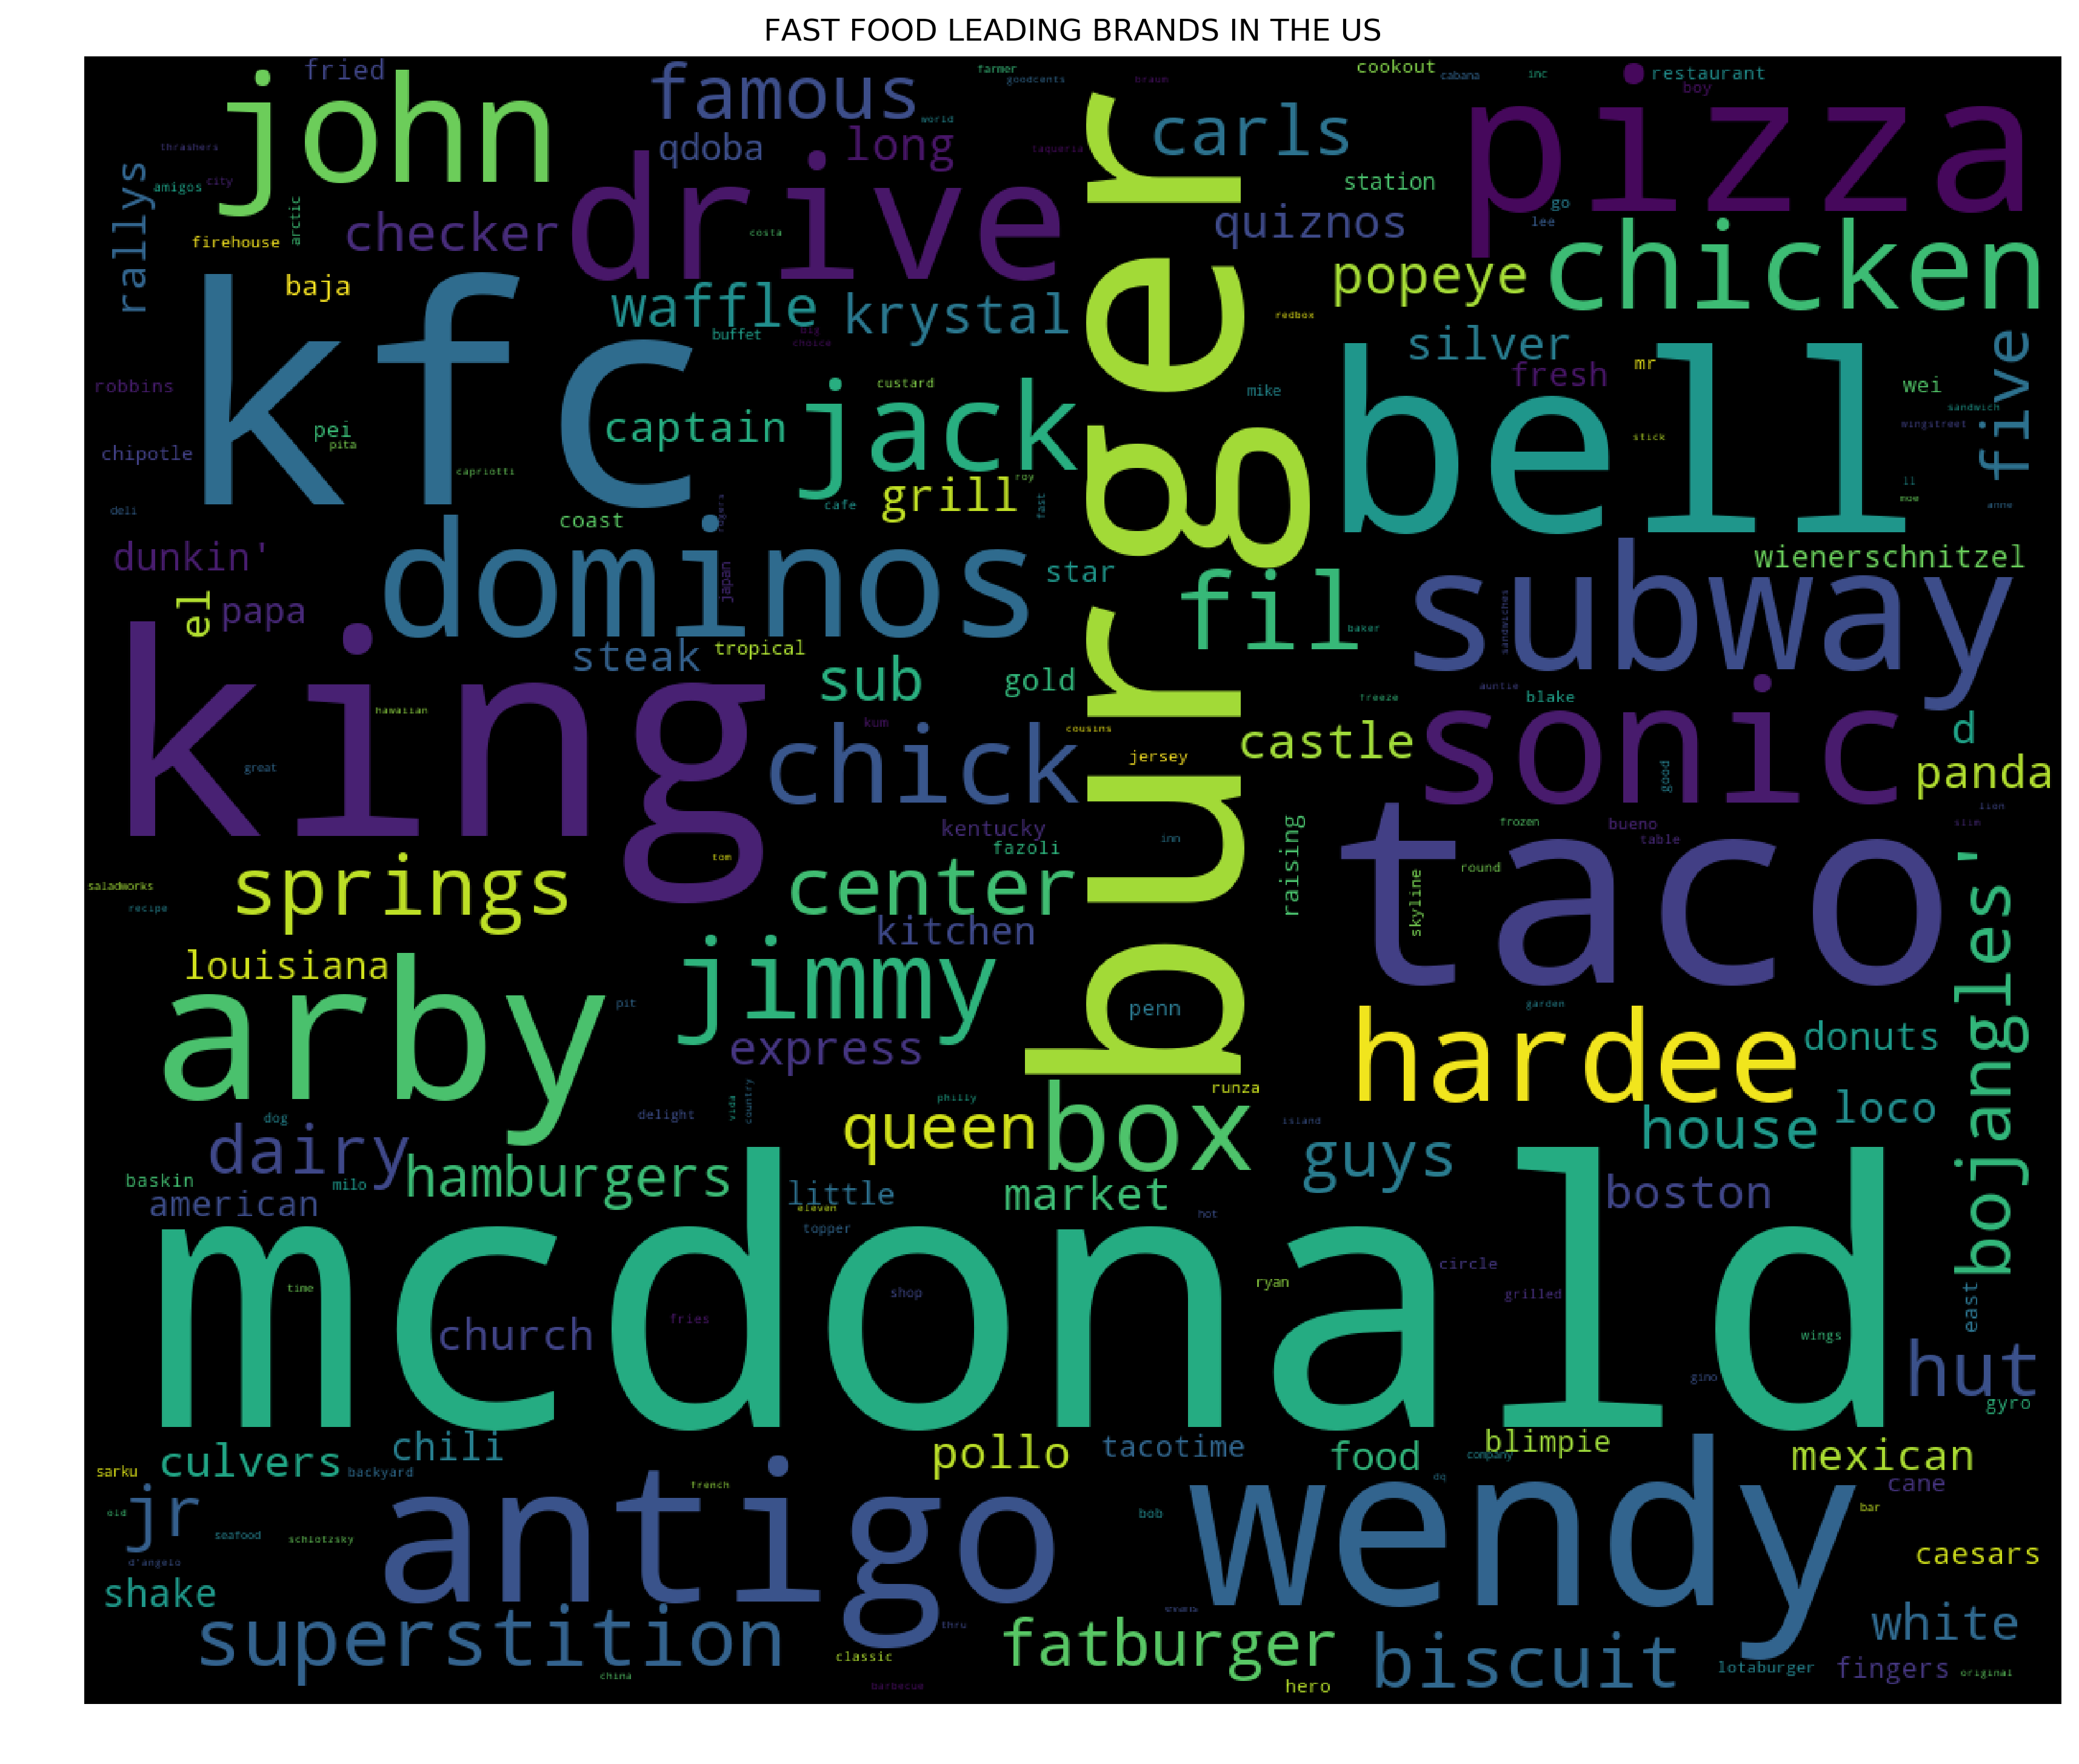

In [86]:
name = list(new_df.name)
resto = [a.replace(' ', '~') for a in name]
word = ' '.join(resto)
t = wc(width=1200, height=1000,collocations = False).generate(word)

plt.figure( figsize=(26,12), dpi=300)
plt.imshow(t)
plt.axis('off')
plt.title('FAST FOOD LEADING BRANDS IN THE US')

In [85]:
top_10_cities = pd.DataFrame(new_df['city'].value_counts(ascending=False).head(10).reset_index())
top_10_cities.columns=['city','total of restaurant']
top_10_cities

,city,total of restaurant
0,cincinnati,119
1,las vegas,72
2,houston,63
3,miami,58
4,denver,52
5,chicago,51
6,phoenix,42
7,atlanta,41
8,oklahoma city,41
9,columbus,41


Text(0.5, 1.0, 'TOP 10 CITY IN THE US WITH HIGH FAST food RATE')

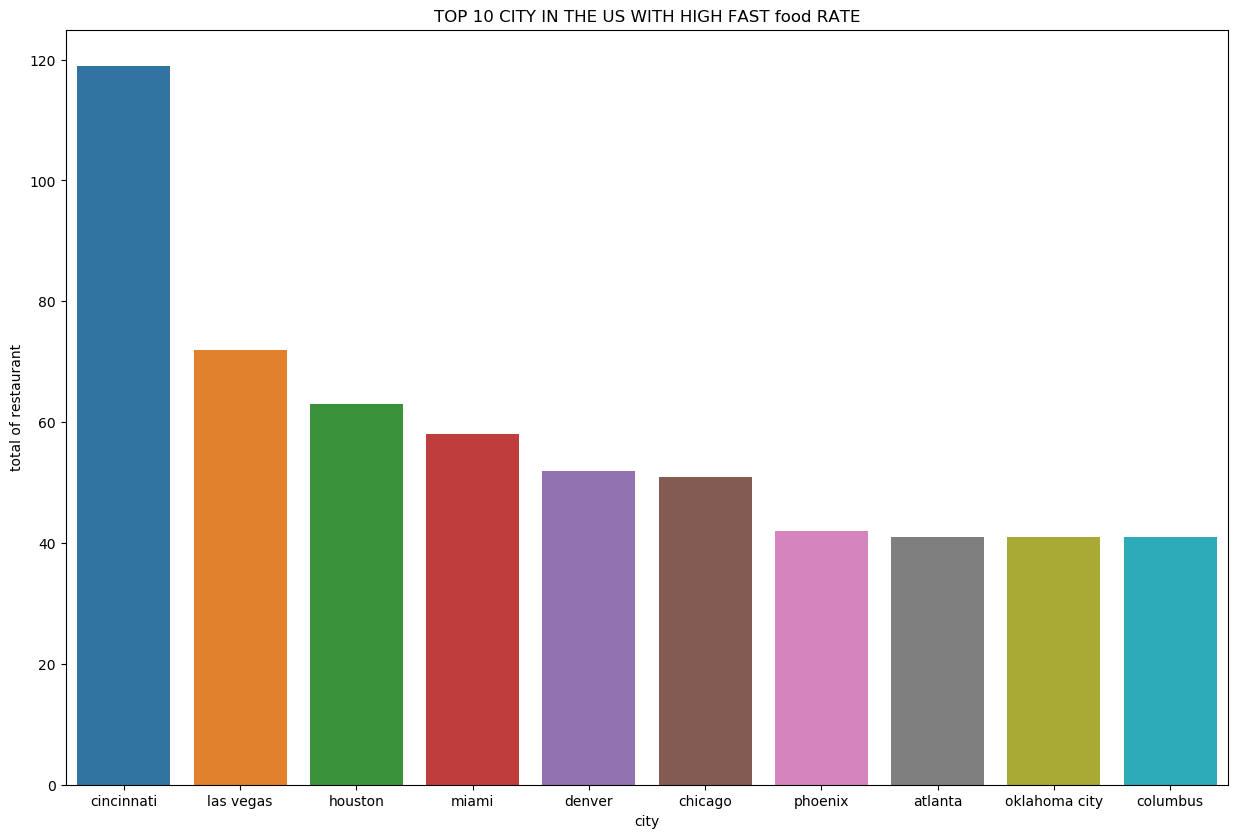

In [90]:
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x='city',y='total of restaurant',data=top_10_cities)
plt.title('TOP 10 CITY IN THE US WITH HIGH FAST food RATE')

# NOW LET'S SEE HOW THE FAST FOOD INDUSTRY INVADE THE AREA.

In [92]:
# SO TO THAT WE GONNA JOIN WE GONNA BRING IN THE MILE SQUARE TABLE
mile_pro = pd.DataFrame(new_df.province.value_counts().sort_values())
mile_pro = mile_pro.join(mile_sq, rsuffix='_province')

In [97]:
mile_pro.rename(columns={'province' : 'total_restaurants', 'mile_sq':'land_area'}, inplace=True)

In [98]:
mile_pro.head(10)

,total_restaurants,land_area
AK,14,663267
DC,21,68
RI,24,1545
MT,25,147042
DE,32,2489
NH,36,9350
HI,40,10931
WY,41,97813
VT,43,9615
ME,44,35385


In [99]:
mile_pro.sort_values(by='total_restaurants', ascending=False).head(10)

,total_restaurants,land_area
CA,676,163695
TX,634,268580
OH,543,44825
FL,471,65755
IN,379,36418
IL,363,57914
NC,358,53818
GA,347,59425
MO,334,69704
KY,332,40410


### NOW WHAT ROLE DOES THE LAND AREA PLAYS IN THE FAST FOOD INDUSTRY


In [46]:
mile_pro.describe()

,total_restaurants,mile_sq
count,51.000000,51.000000
mean,196.078431,74398.392157
std,154.745448,96677.051185
min,14.000000,68.000000
25%,92.500000,35901.500000
50%,159.000000,56271.000000
75%,260.000000,84234.000000
max,676.000000,663267.000000


**we gonna use an histogram to understand the relation if there's any. but let's first scale the data to make it fit within one scale**

In [108]:
from mlxtend.preprocessing import minmax_scaling #we import the necessary tool

#then fit or scale the data whithin 0-1 
scaled_rest = minmax_scaling(mile_pro['total_restaurants'], columns = [0])


In [104]:
scaled_mile = minmax_scaling(mile_pro['land_area'], columns = [0])

In [109]:
scaled_rest[0:5]

array([[0.        ],
       [0.01057402],
       [0.01510574],
       [0.01661631],
       [0.02719033]])

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN RESTAURANTS AND SIZE OF LAND IN EACH STATES')

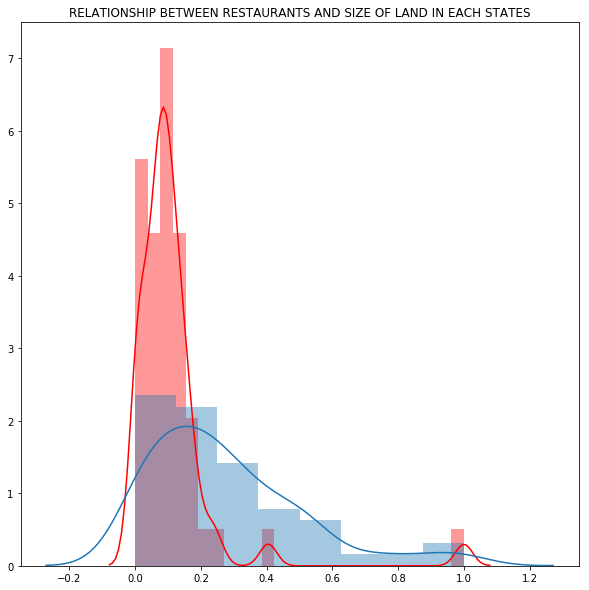

In [114]:
plt.figure(figsize=(10,10))

sns.distplot(scaled_mile, color='r')
sns.distplot(scaled_rest)
plt.title('RELATIONSHIP BETWEEN RESTAURANTS AND SIZE OF LAND IN EACH STATES')

**WELL DAPENDING ON HOW YOU LOOK AT IT.**

WHAT IS TRUE THOUGH IS THAT THIS TWO VARIABLES ARE INDEPENDANT AND ALTHOUGH IT MIGHT LOOKS LIKE THERE'S A RELATIOSHIP IT IS VERY WEAK.

In [568]:
z=new_df.set_index('province')
z.loc['OH',['longitude','latitude']].mean()

longitude   -82.791522
latitude     40.103287
dtype: float64

Text(0.5, 1.0, 'FAST FOOD LAND AREA INVASION')

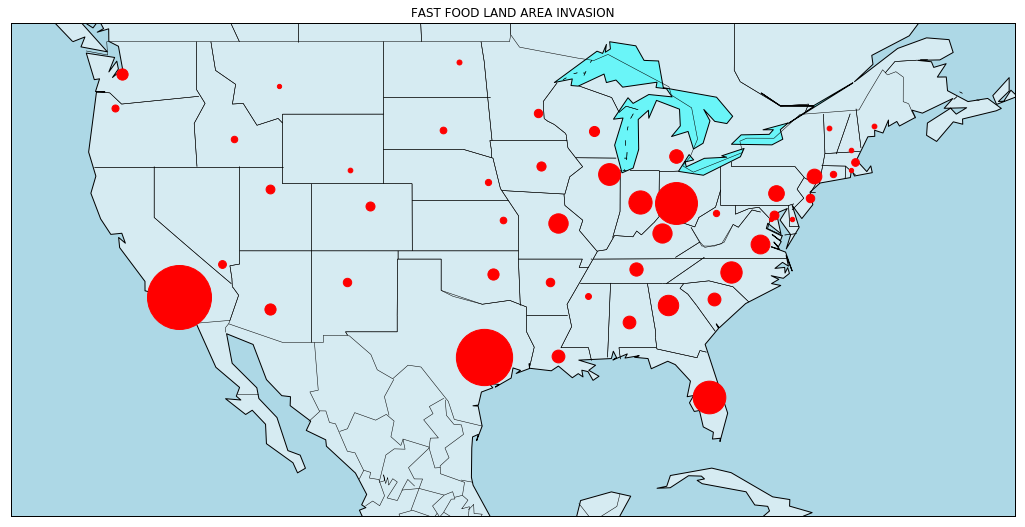

In [117]:

plt.figure(figsize=(18,18))
mapa  = Basemap(projection='mill', llcrnrlat=20, urcrnrlat=50, 
                                   llcrnrlon=-130, urcrnrlon=-60, resolution='c',
                                   width = 90000, height=120000)#  over here we draw the map limit
                                                                                 #  in this case USA limit



#then we draw the necessary lines, boundaries and colors
mapa.drawcoastlines()
mapa.fillcontinents(color='white',lake_color='aqua',alpha=0.5)
mapa.drawmapboundary(fill_color='lightblue')
mapa.drawstates()
mapa.drawcountries()


#OVER HERE WE LOOP THROUGH THE INDES OF THE MILE_PRO DF WHICH AS THE STATES AS IT INDEX
#AND WE GONNA USE THE SCALES RESTAURANT DATA TO SET THE SIZE OF THE MARKER
for i,each in zip(mile_pro.index,scaled_rest):
    z=new_df.set_index('province')
    #WE GONNA USE THE MEDIAN TO GET THE CENTRAL LOCATION
    lat = z.loc[i,'latitude'].median()
    lon = z.loc[i,'longitude'].median()


    #then we set x,y axis based on the "Co spgs" data we have colected
    x,y= mapa(lon,lat)
    #plt.figure(num=None,figsize=(18,18))
    #now we plot the one of the restaurant and set the color red
    mapa.plot(x,y,'ro',markersize=(each+1)**4*4, alpha=1)
plt.title('FAST FOOD LAND AREA INVASION')

### LET'S GET ALSO A VISUAL REPRESENTATION OF EACH RESTAURANT ON IT ACTUAL LOCATION

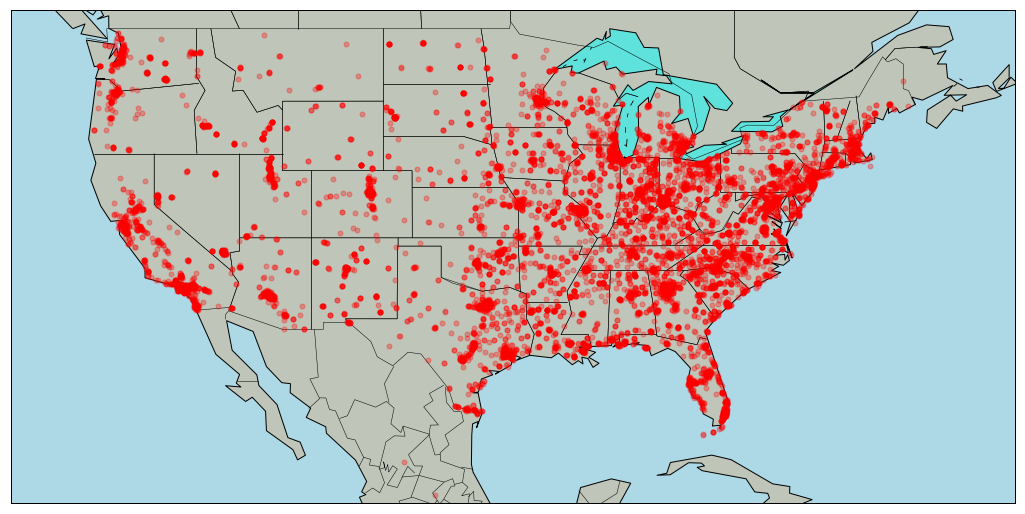

In [21]:
m  = Basemap(projection='mill', llcrnrlat=20, urcrnrlat=50, llcrnrlon=-130,\
             urcrnrlon=-60, resolution='c')

plt.figure(num=None,figsize=(18,18))
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='aqua',alpha=0.5)
m.drawmapboundary(fill_color='lightblue')
m.drawstates()
m.drawcountries()
m.drawmapboundary()

lat = list(new_df['latitude'])
lon = list(new_df['longitude'])
x,y = m(lon,lat)


m.plot(x,y,'ro',markersize=5, alpha=0.3)


for i,each in zip(mile_pro.index,mile_pro.province):
    print(each,i)

## you have the reach the end of our Fast food dataset story.